In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:
path = "S$P 500.csv"
snp_df=pd.read_csv(path)

In [5]:
snp_df.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/01/2010,1116.560059,1133.869995,1116.560059,1132.98999,1132.98999,3991400000


In [6]:
snp_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df_snp= snp_df.copy()

In [8]:
df_snp["Date"]=pd.to_datetime(df_snp["Date"],format='%d/%m/%Y')
df_snp.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.98999,1132.98999,3991400000


In [9]:
df_snp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540 entries, 0 to 2539
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2540 non-null   datetime64[ns]
 1   Open       2540 non-null   float64       
 2   High       2540 non-null   float64       
 3   Low        2540 non-null   float64       
 4   Close      2540 non-null   float64       
 5   Adj Close  2540 non-null   float64       
 6   Volume     2540 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 139.0 KB


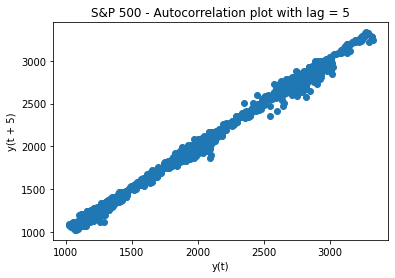

In [10]:
plt.figure()
lag_plot(df_snp['Close'], lag=5)
plt.title('S&P 500 - Autocorrelation plot with lag = 5')
plt.show()

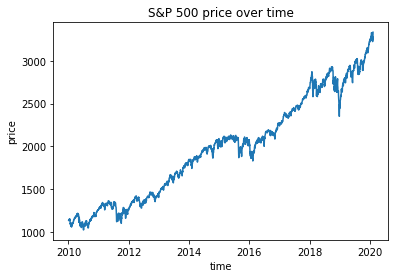

In [11]:
plt.plot(df_snp["Date"], df_snp["Close"])
# plt.xticks(np.arange(0,2485,100), df1['Date'][0:2485:100])
plt.title("S&P 500 price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [13]:
train_data, test_data = df_snp[0:int(len(df_snp)*0.8)], df_snp[int(len(df_snp)*0.8):]

In [14]:
training_data = train_data['Close'].values
test_data = test_data['Close'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    #yhat = output[0][0]
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

  
MSE_error = mean_squared_error(test_data, model_predictions)  
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 683.9037942364621


In [15]:
print(model_fit.summary())

ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2538
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10850.814
Method:                       css-mle   S.D. of innovations             17.399
Date:                Fri, 19 Feb 2021   AIC                          21715.627
Time:                        09:42:05   BIC                          21756.501
Sample:                             1   HQIC                         21730.455
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8509      0.304      2.800      0.005       0.255       1.446
ar.L1.D.y     -0.0346      0.020     -1.742      0.081      -0.073       0.004
ar.L2.D.y     -0.0260      0.020     -1.311      0.190      -0.065       0.013
ar

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
series=df_snp['Close']
series

0       1132.989990
1       1136.520020
2       1137.140015
3       1141.689941
4       1144.979980
           ...     
2535    3283.659912
2536    3225.520020
2537    3248.919922
2538    3297.590088
2539    3334.689941
Name: Close, Length: 2540, dtype: float64

In [18]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, window = 12, cutoff = 0.01):
#Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        pvalue = dftest[1]
        if pvalue < cutoff:
          print('p-value = %.4f. The series is likely stationary.' % pvalue)
        else:
          print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    print(dfoutput)

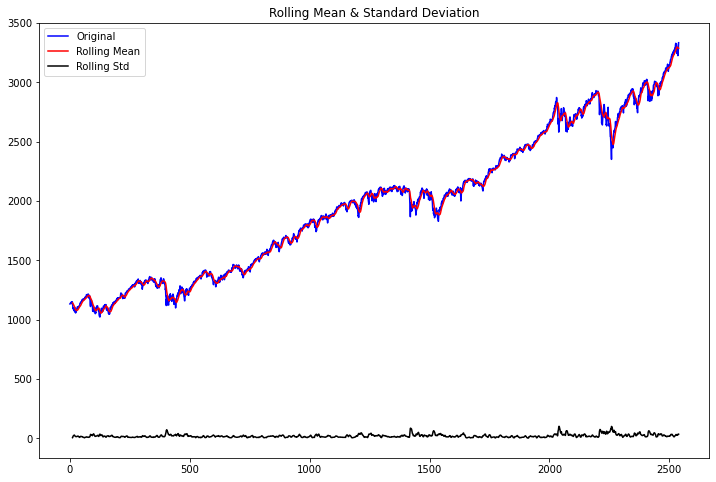

Results of Dickey-Fuller Test:
p-value = 0.9886. The series is likely non-stationary.
p-value = 0.9886. The series is likely non-stationary.
p-value = 0.9886. The series is likely non-stationary.
Test Statistic                    0.642403
p-value                           0.988615
#Lags Used                       19.000000
Number of Observations Used    2520.000000
Critical Value (1%)              -3.432948
Critical Value (5%)              -2.862688
Critical Value (10%)             -2.567381
dtype: float64


In [19]:
test_stationarity(series)

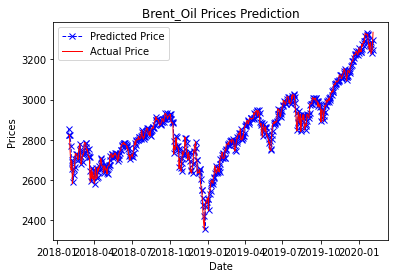

In [20]:
test_set_range = df_snp[int(len(df_snp)*0.8):].Date
plt.plot(test_set_range, model_predictions, color='blue', marker='x', linestyle='dashed',label='Predicted Price', lw=1)
plt.plot(test_set_range, test_data, color='red', label='Actual Price', lw=1)
plt.title('Brent_Oil Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
# plt.xticks(np.arange(881,1259,50), df1.Date[881:1259:50])
plt.legend()
plt.show()

In [21]:
date_df=pd.DataFrame(df_snp[int(len(df_snp)*0.8):].Date)
df_test = pd.DataFrame(data=test_data)
df_preds = pd.DataFrame(data=model_predictions)

display(date_df.head(3), df_test.head(3), df_preds.head(3))

,Date
2032,2018-01-30
2033,2018-01-31
2034,2018-02-01


,0
0,2822.429932
1,2823.810059
2,2821.979980


,0
0,2854.955277
1,2823.221325
2,2824.498257


In [22]:
date_df.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_preds.reset_index(drop=True, inplace=True)

df_preds = df_preds.shift(periods=-1)

# p = p.iloc[:-1]
# t = t.iloc[:-1]

frames=[date_df['Date'],df_test[0],df_preds[0]]
headers=['Date','test','preds']
graphdata= pd.concat(frames, axis=1, keys=headers)

# graphdata = df_test.merge(df_preds, how='inner', suffixes=('_actual', '_prediction'))
graphdata

,Date,test,preds
0,2018-01-30,2822.429932,2823.221325
1,2018-01-31,2823.810059,2824.498257
2,2018-02-01,2821.979980,2823.108575
3,2018-02-02,2762.129883,2767.283271
4,2018-02-05,2648.939941,2653.827500
...,...,...,...
503,2020-01-30,3283.659912,3287.426545
504,2020-01-31,3225.520020,3230.374633
505,2020-02-03,3248.919922,3248.539769
506,2020-02-04,3297.590088,3296.273704


In [23]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure([

    go.Scatter(
        name='Actual',
        x=graphdata.Date,
        y=graphdata['test'],
        mode='lines',
        marker=dict(color="#008080"),
        line=dict(width=1),
        showlegend=True
    ),
    go.Scatter(
        name='Prediction',
        x=graphdata.Date,
        y=graphdata['preds'],
        marker=dict(color="#FF8C00"),
        line=dict(width=1),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        showlegend=True
    )
])

fig.update_layout(
    yaxis_title='',
    title='',
    hovermode="x"
)

fig.show()